# Show difference in counts and Log2FoldChange over timepoints.

In [62]:
import scanpy as sc
import decoupler as dc
import numpy as np
import pandas as pd
import anndata as ad
from anndata import AnnData
import matplotlib.pyplot as plt

In [51]:
metadata = pd.read_csv('../data/2023_MAFA_MetaData.txt', index_col=0, sep='\t')
# metadata = metadata[metadata.Treatment == "MAFA"]
metadata

,Sample_Description,Treatment,Genotype,TimePoint,Batch,DOX,GroupName
SampleID,,,,,,,
MAFAWT_001,MAFAWT,MAFA,WT,T0,1,N,MAFA_WT_T0
MAFAWT_002,MAFAWT,MAFA,WT,T0,1,N,MAFA_WT_T0
MAFAWT_003,MAFAWT,MAFA,WT,T0,1,N,MAFA_WT_T0
MAFAWT_004,MAFAWT,MAFA,WT,T0,1,N,MAFA_WT_T0
MAFAWT_005,MAFAWT,MAFA,WT,T2,1,Y,MAFA_WT_T2
MAFAWT_006,MAFAWT,MAFA,WT,T2,1,Y,MAFA_WT_T2
MAFAWT_007,MAFAWT,MAFA,WT,T2,1,Y,MAFA_WT_T2
MAFAWT_008,MAFAWT,MAFA,WT,T2,1,Y,MAFA_WT_T2
MAFAWT_009,MAFAWT,MAFA,WT,T1,1,Y,MAFA_WT_T1


In [59]:
# Read raw data and process it
adata = pd.read_csv('../data/MAFA_WT_gene_count.txt', index_col=20, sep='\t').T
#subset to Genes of interest
goi = pd.read_csv("../data/table_comparison_all_GOI.csv")

#TODO add count normalization 
adata 

# dds <- DESeqDataSetFromMatrix(countData = adata, colData = metadata, design = ~ SampleID)




# subset_GOI = adata.loc[:, adata.columns.isin(goi['WT_GOI'])]
# subset_GOI = subset_GOI.join(metadata['TimePoint'], how='left')
# subset_T0 = subset_GOI[subset_GOI.TimePoint == 'T0']
# subset_T1 = subset_GOI[subset_GOI.TimePoint == 'T1']
# subset_T2 = subset_GOI[subset_GOI.TimePoint == 'T2']

# subset_GOI = pd.concat([subset_T0, subset_T1, subset_T2])
# subset_GOI

,NEUROD1,NKX6-1,MAFA,PDX1,NR3C1,STAT3,GLIS3,ASCL2,MLXIP,AHR,...,NR1D1,MITF,E2F2,NR1H4,MEF2C,WWTR1,REST,FHL2,HEYL,TimePoint
MAFAWT_001,10346,4195,1024,3915,4757,3058,1645,2387,1578,1398,...,256,66,124,105,192,23,36,109,26,T0
MAFAWT_002,11223,6865,354,4070,6623,3180,2532,2626,1792,2713,...,194,57,149,69,122,18,28,74,17,T0
MAFAWT_003,13854,9178,338,4523,6691,3128,2057,2060,1838,2961,...,208,82,129,136,72,28,30,59,17,T0
MAFAWT_004,13695,8226,232,4109,8217,3590,2167,2291,1736,2918,...,236,121,110,173,183,35,31,77,21,T0
MAFAWT_009,6221,12168,18225,7001,2623,4418,3821,3462,3090,1452,...,176,262,95,45,39,67,65,34,21,T1
MAFAWT_010,6365,12927,15164,6532,3591,3916,3568,2538,3048,1558,...,219,271,90,45,36,87,85,22,28,T1
MAFAWT_011,6604,12745,16847,6455,3229,4709,3586,2544,3005,1521,...,222,334,81,68,54,152,81,38,43,T1
MAFAWT_005,5503,16654,26618,8996,1469,6067,5033,5111,3900,856,...,337,468,28,52,35,93,128,17,56,T2
MAFAWT_006,3045,11993,37529,6658,1376,5741,4917,4005,3503,844,...,331,529,26,17,47,150,229,11,57,T2
MAFAWT_007,6441,16583,22361,10279,2738,7488,5341,4172,4056,1173,...,310,506,103,59,51,100,115,24,62,T2


In [113]:
# Read in LFC + avg basemean from tables
# subset results df by list of genes from veronica
goi_t01 = pd.read_csv("../figures/direct/WT_T0_T1/goi_timepoints_01.csv", usecols=[0, 1, 2])
goi_t02 = pd.read_csv("../figures/direct/WT_T0_T2/goi_timepoints_02.csv", usecols=[0, 1, 2])

In [109]:
# goi_t01 = goi_t01[goi_t01['gene_name'] == 'MAFA']
# goi_t02 = goi_t02[goi_t02['gene_name'] == 'MAFA']
# lfc_df = pd.concat([goi_t01, goi_t02])
# lfc_df = lfc_df.rename(columns={'gene_name': 'timepoint'})
# lfc_df

,timepoint,baseMean,log2FoldChange
2,MAFA,8003.367,5.225458
2,MAFA,13793.121,5.819076


NEUROD1


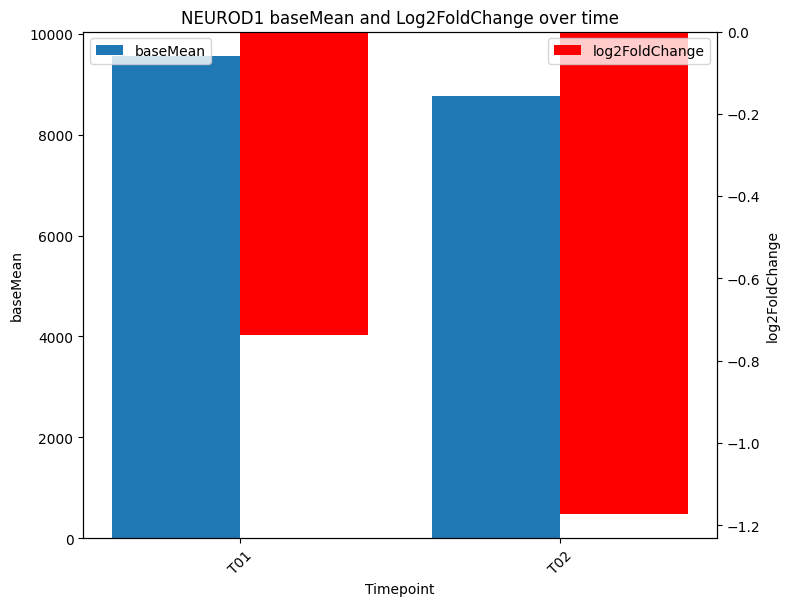

NKX6-1


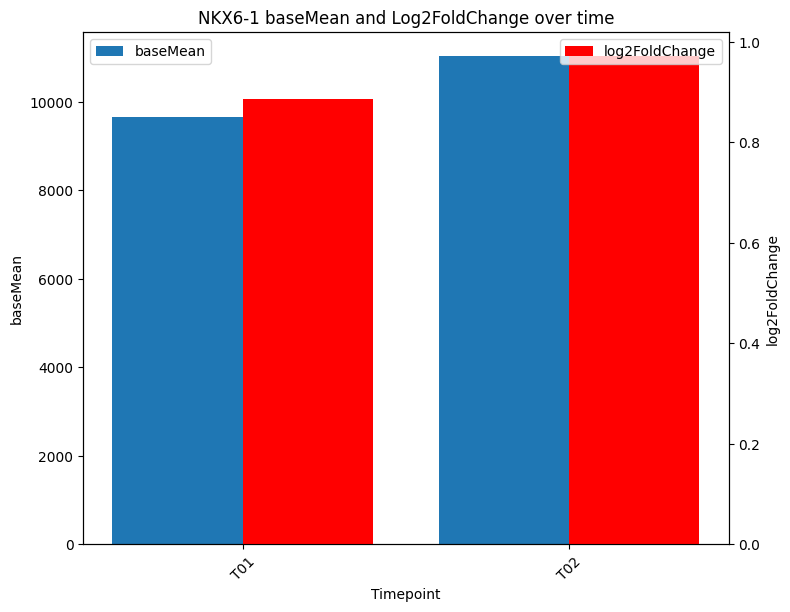

MAFA


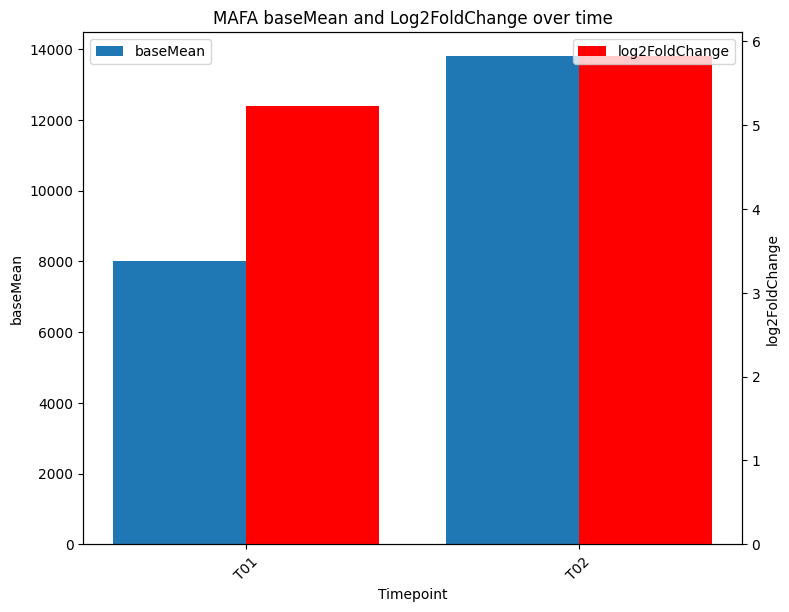

PDX1


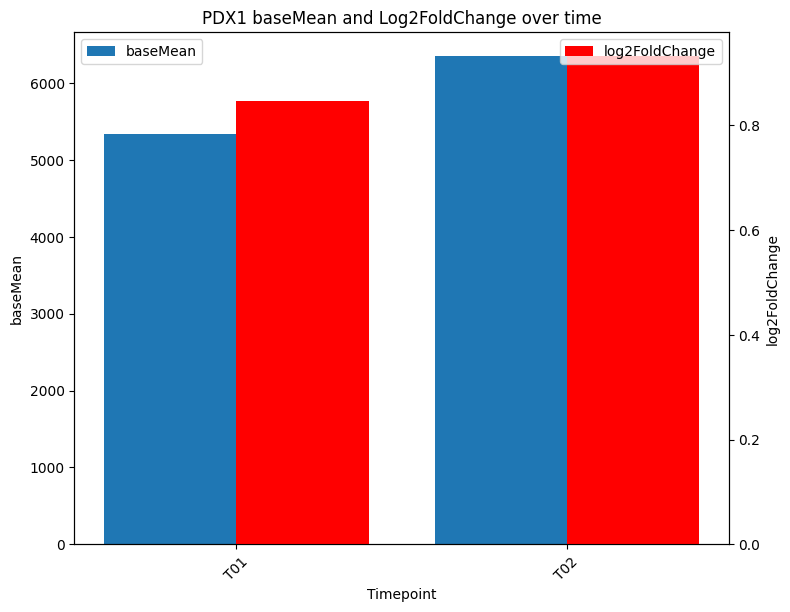

NR3C1


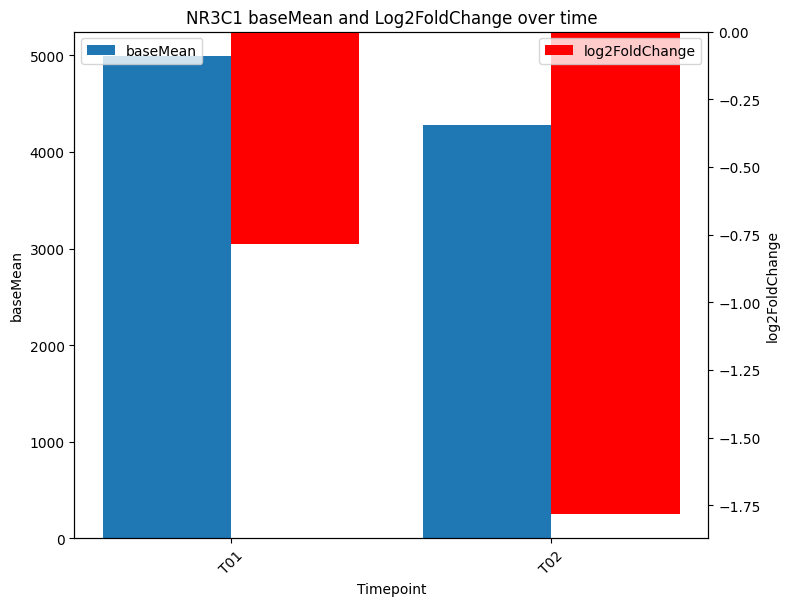

STAT3


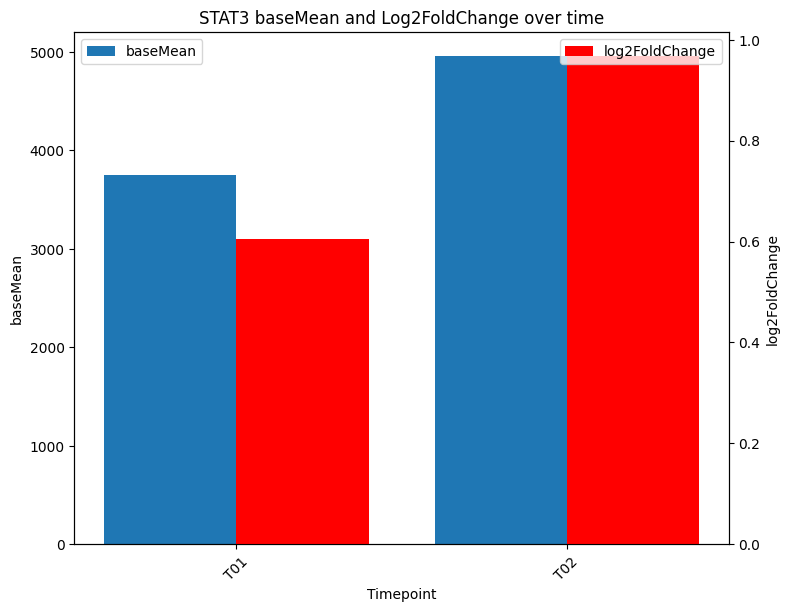

GLIS3


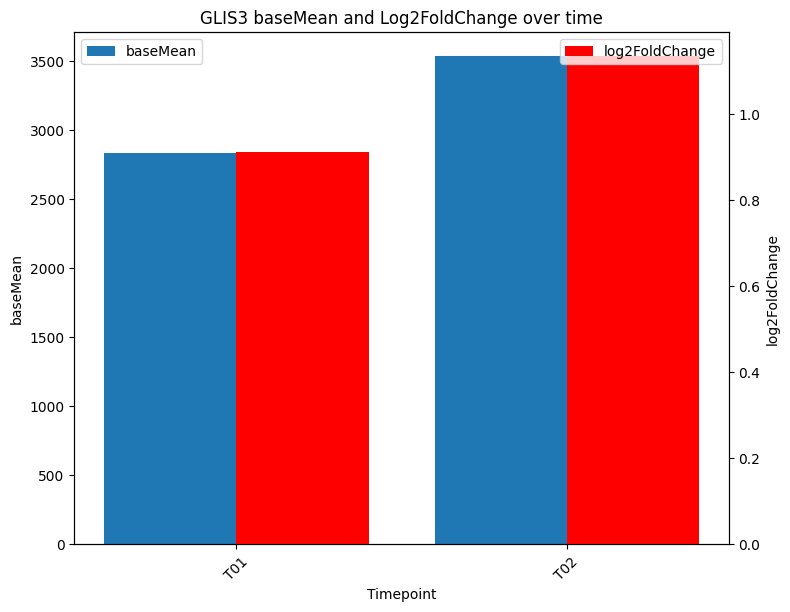

ASCL2


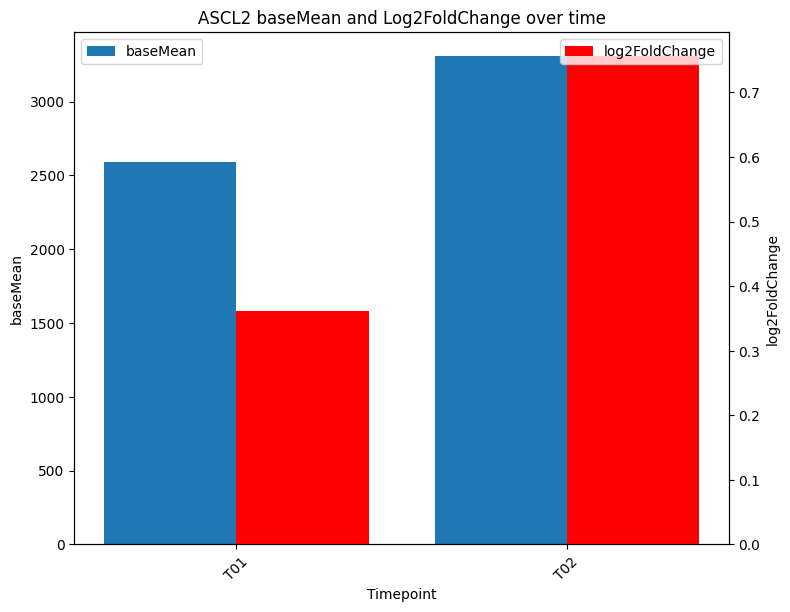

MLXIP


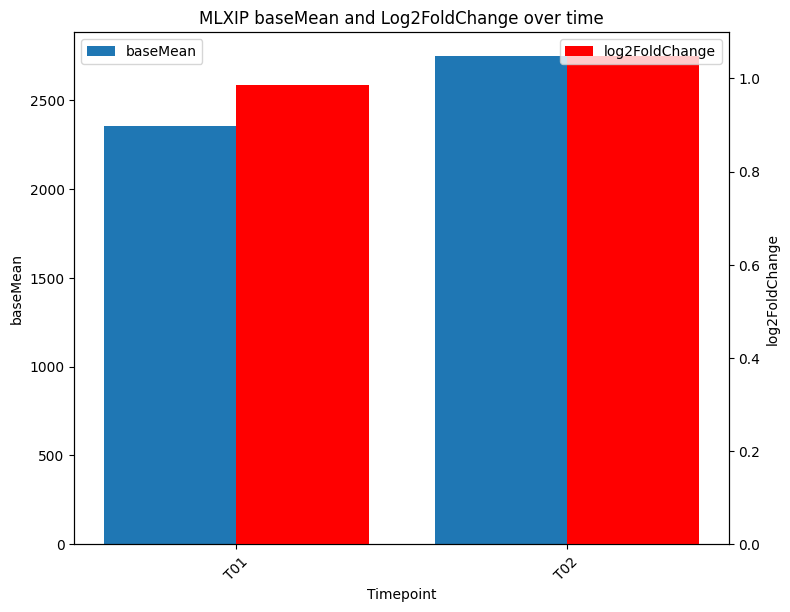

AHR


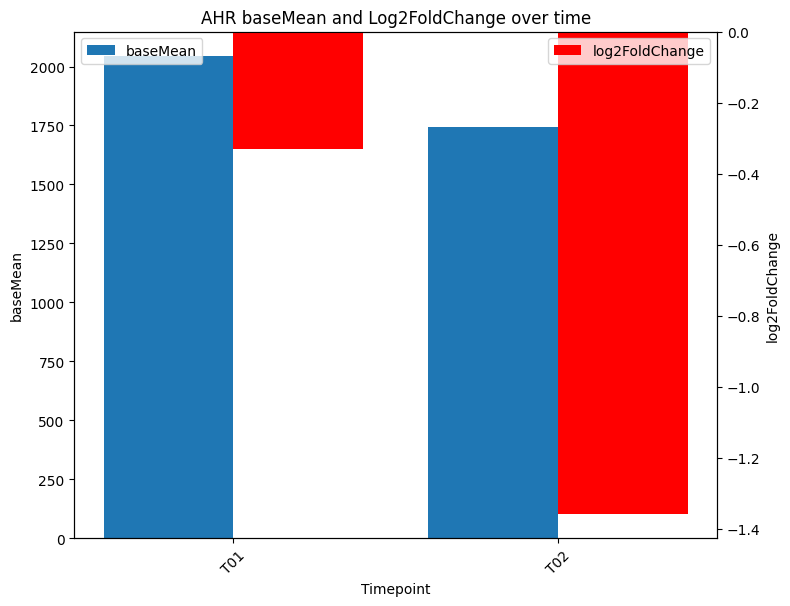

ZBTB17


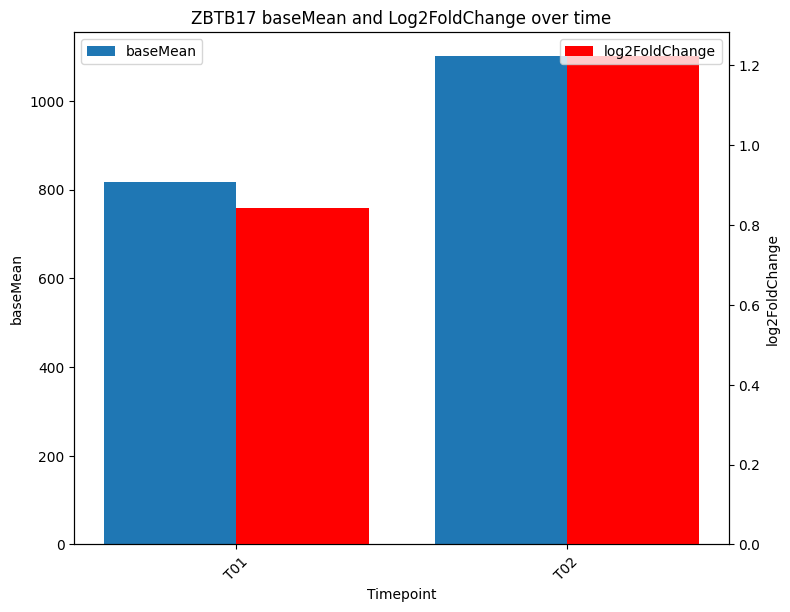

PGR


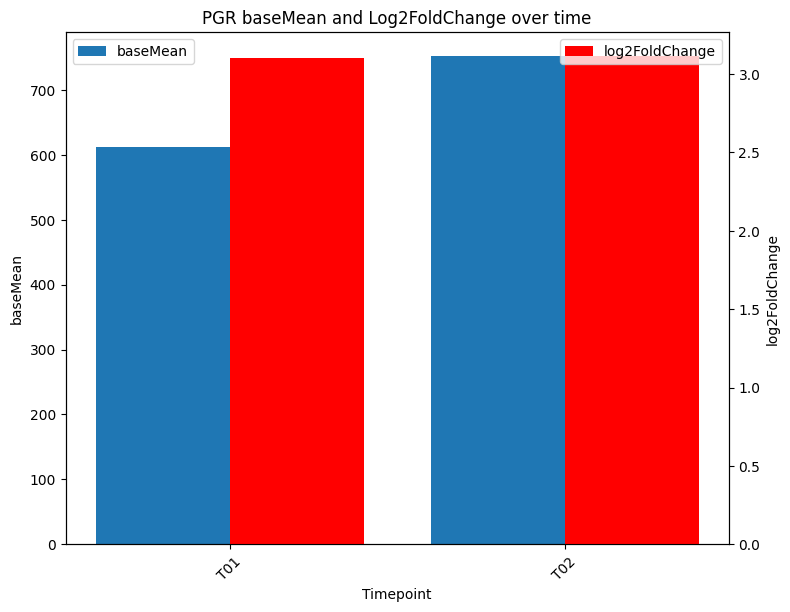

ASCL1


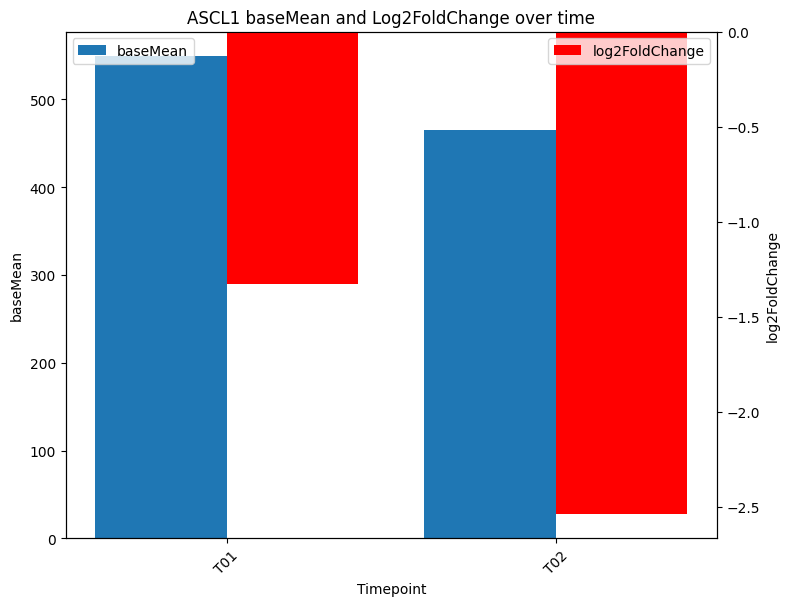

HNF1B


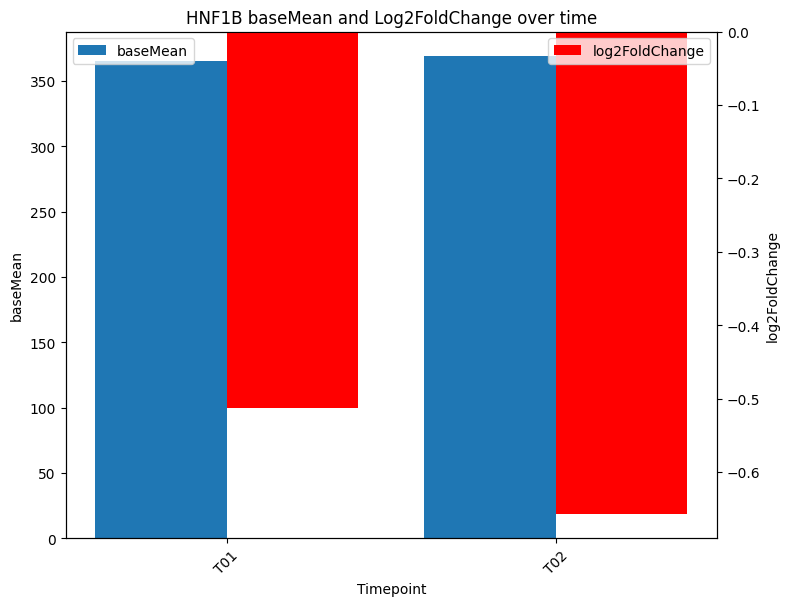

YBX3


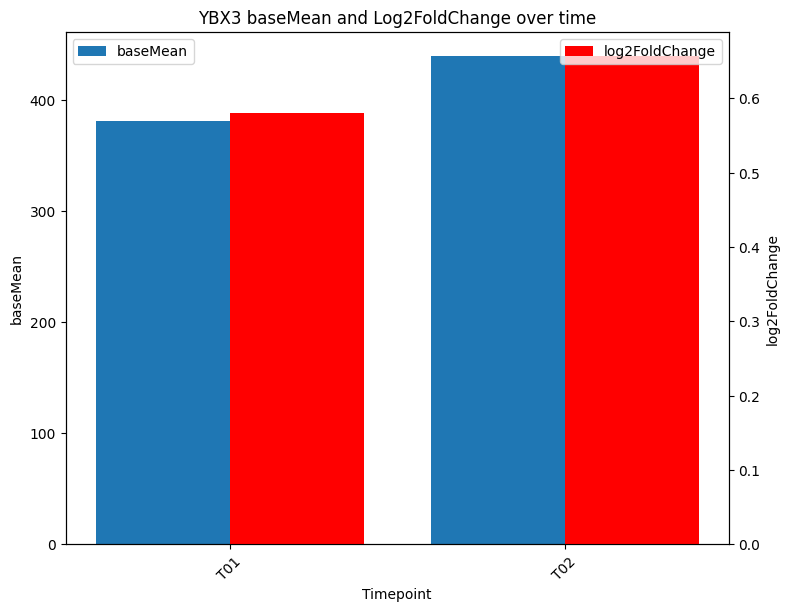

ARID5B


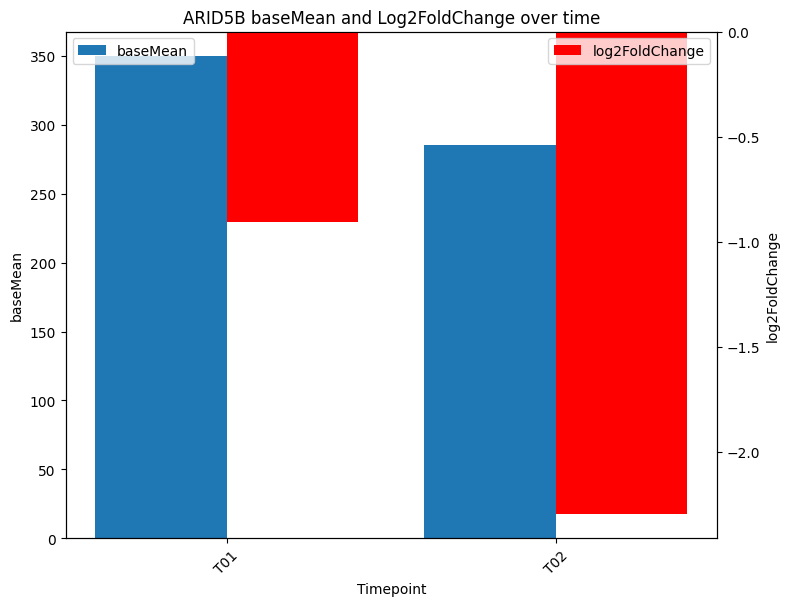

E2F3


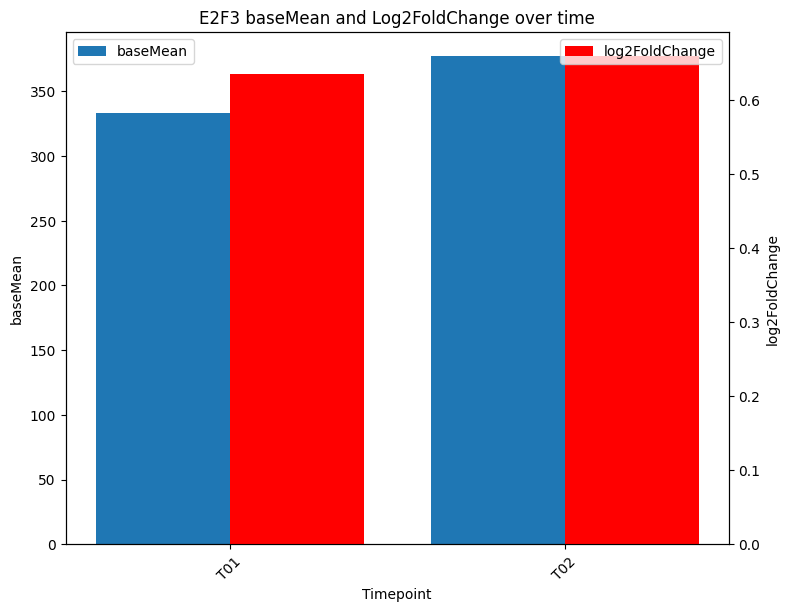

E2F1


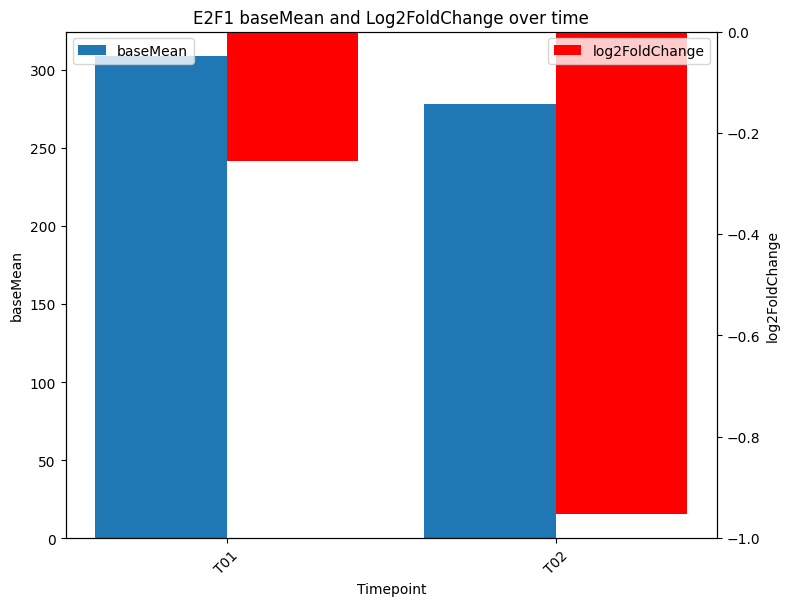

IRX1


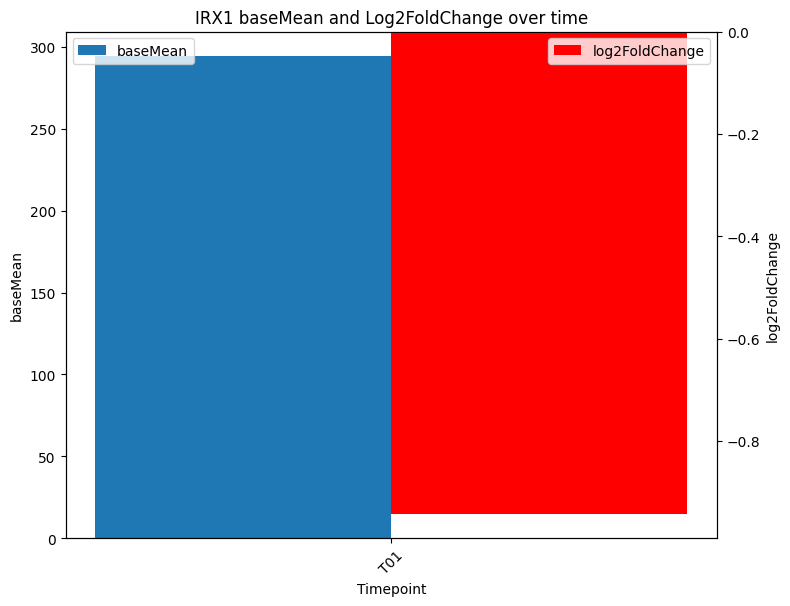

IRF2


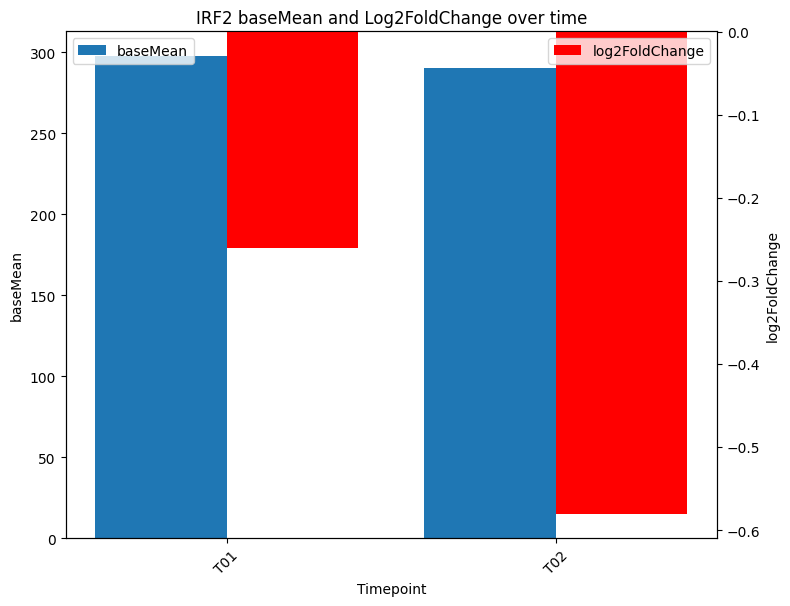

FOXM1


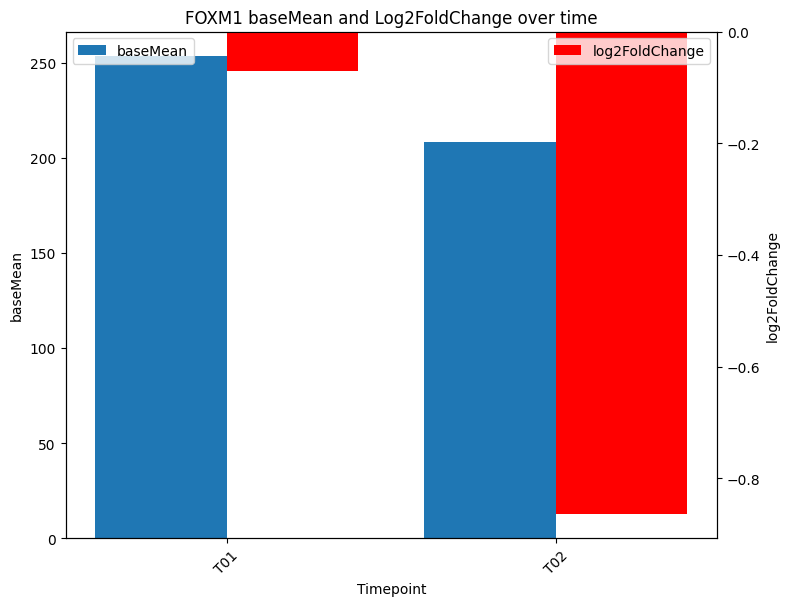

MXI1


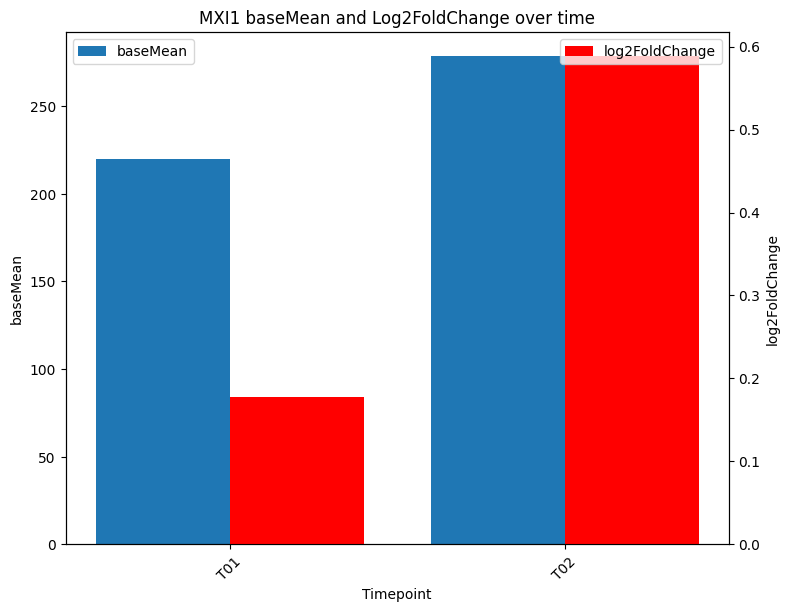

NR1D1


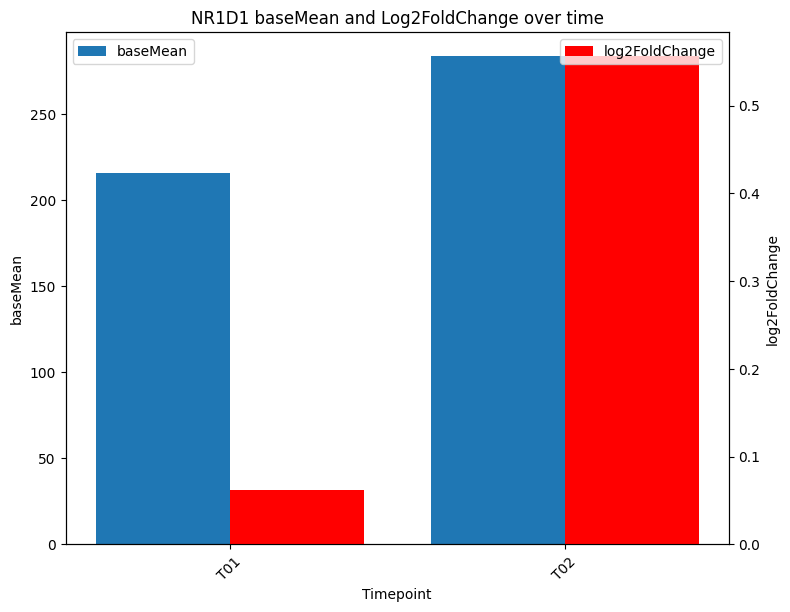

MITF


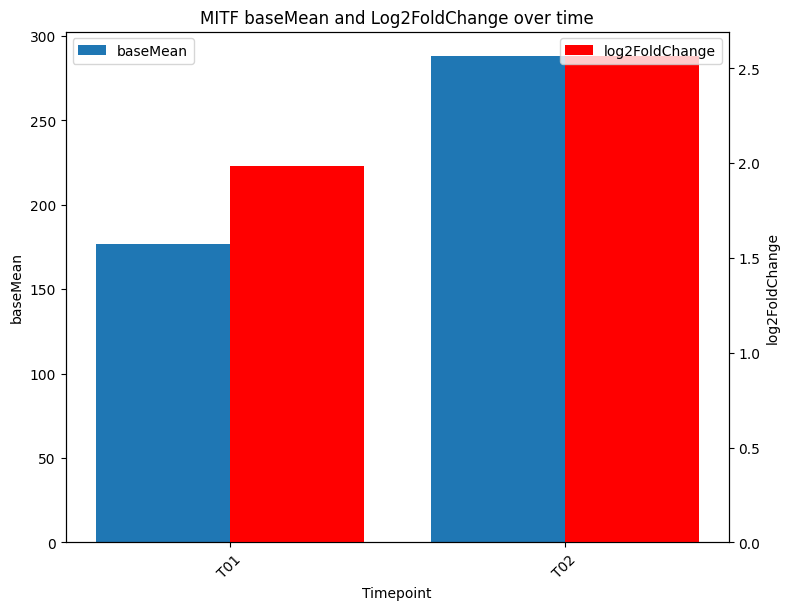

E2F2


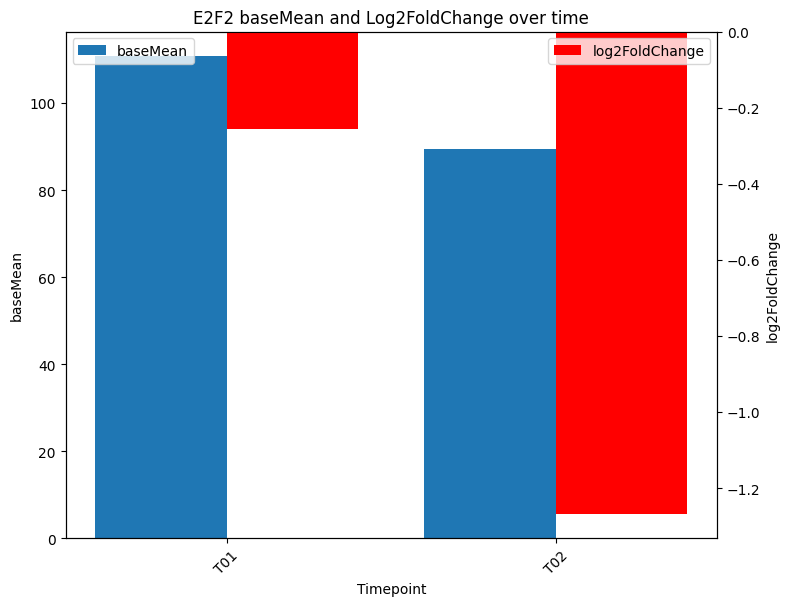

NR1H4


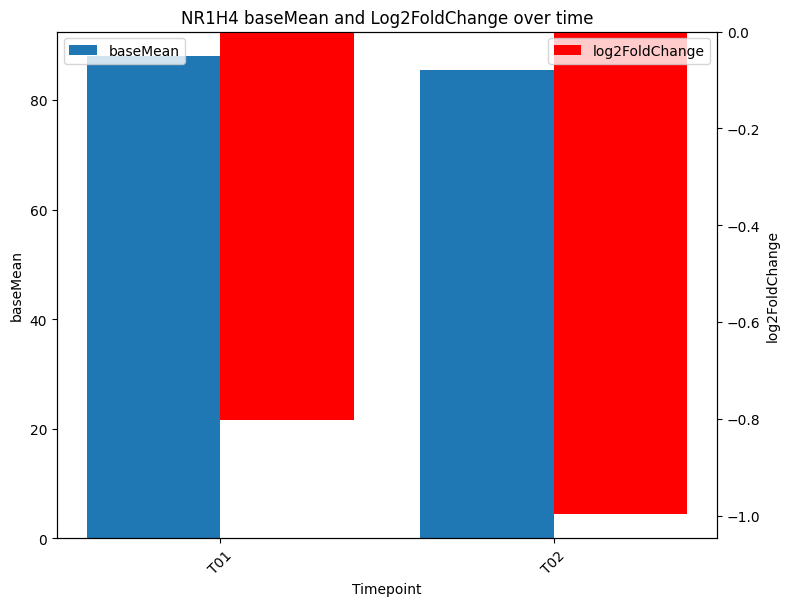

MEF2C


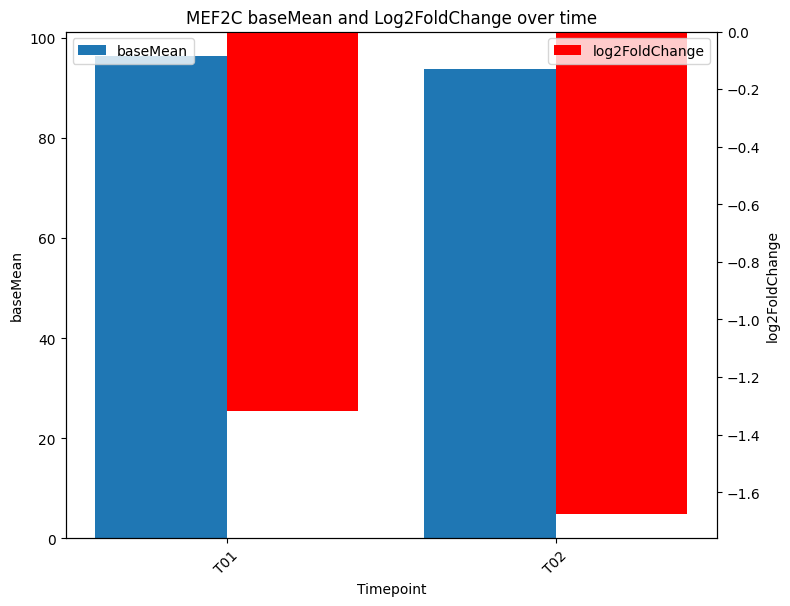

WWTR1


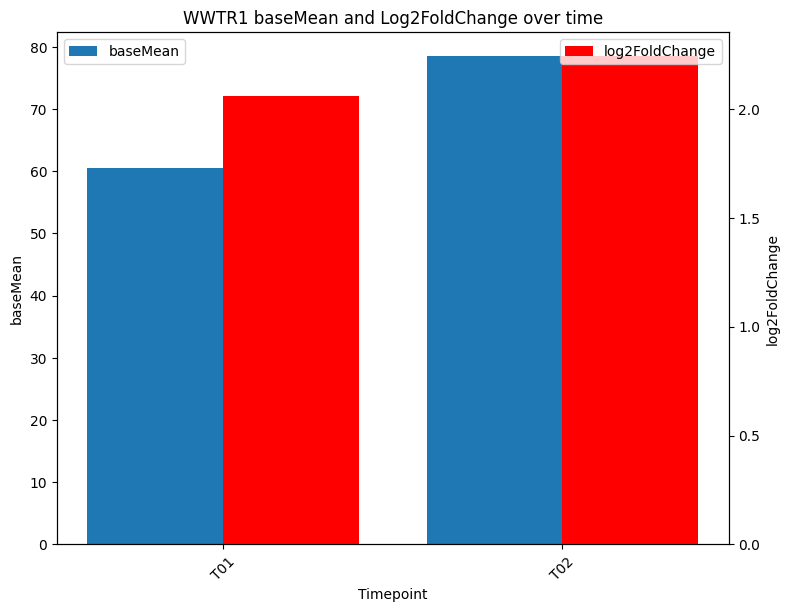

REST


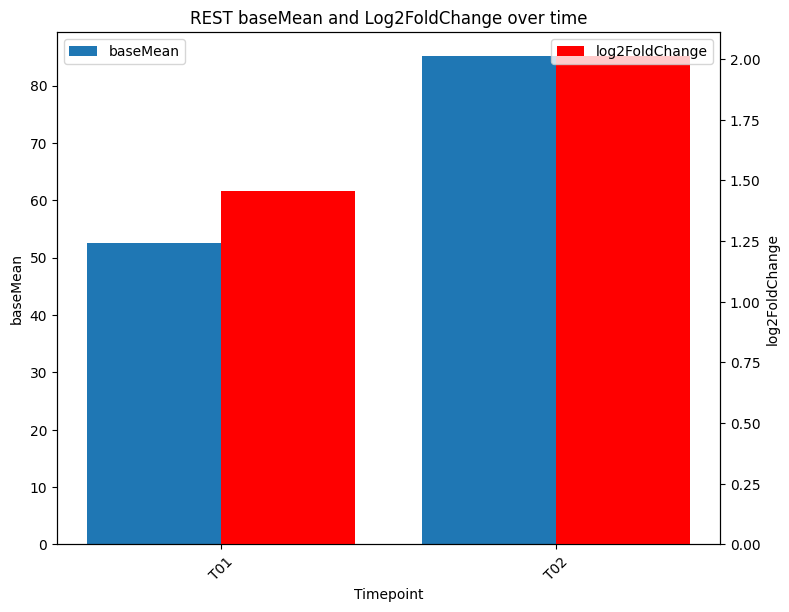

FHL2


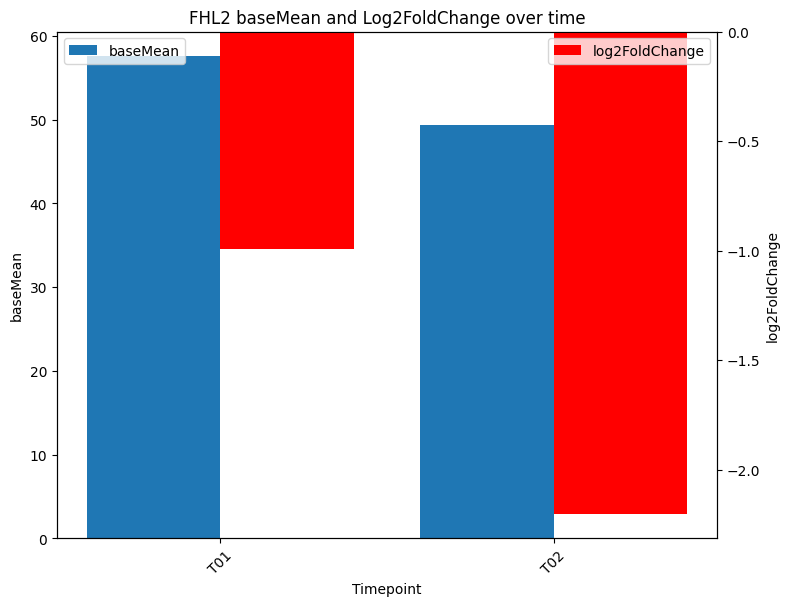

HEYL


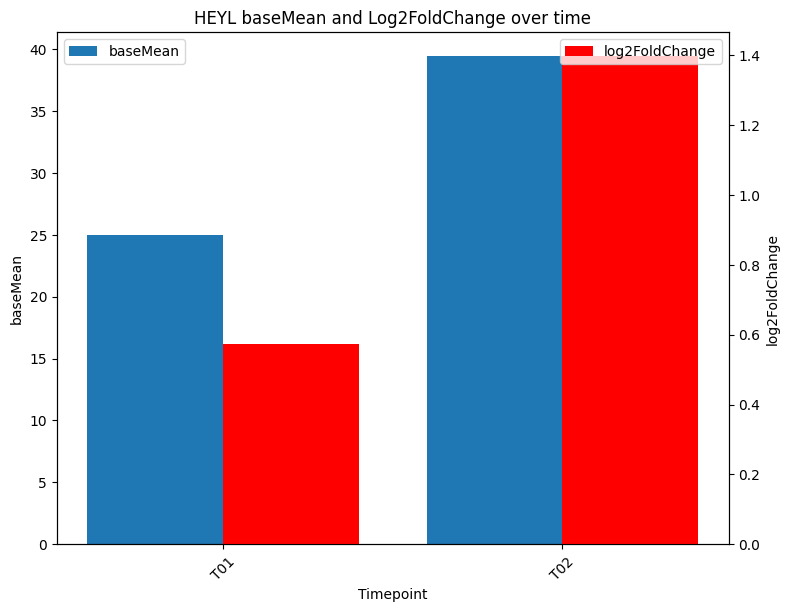

In [125]:
for gene in subset_GOI.columns[:-1]:
    print(gene)
    gene_t01 = goi_t01[goi_t01['gene_name'] == gene]
    gene_t01.loc[:, 'gene_name'] = 'T01'
    gene_t02 = goi_t02[goi_t02['gene_name'] == gene]
    gene_t02.loc[:, 'gene_name'] = 'T02'
    lfc_df = pd.concat([gene_t01, gene_t02])
    lfc_df = lfc_df.rename(columns={'gene_name': 'timepoint'})

    # make a plot for each entry in genes of interest
    fig, ax1 = plt.subplots(figsize=(8, 6))
    X = lfc_df['timepoint']
    baseMean = lfc_df['baseMean']
    log2FoldChange = lfc_df['log2FoldChange']
    X_axis = np.arange(len(X))

    # Create the first bar plot
    ax1.bar(X_axis - 0.2, baseMean, 0.4, label='baseMean')
    ax1.set_xlabel('Timepoint')
    ax1.set_ylabel('baseMean')
    ax1.set_xticks(X_axis)
    ax1.set_xticklabels(X, rotation=45)
    ax1.legend(loc='upper left')

    # Create the second y-axis
    ax2 = ax1.twinx()
    ax2.bar(X_axis + 0.2, log2FoldChange, 0.4, label='log2FoldChange', color='r')
    ax2.set_ylabel('log2FoldChange')
    ax2.legend(loc='upper right')
    fig.tight_layout()
    plt.title(f'{gene} baseMean and Log2FoldChange over time')

    plt.show()

    #how to show negatives?

    

NEUROD1


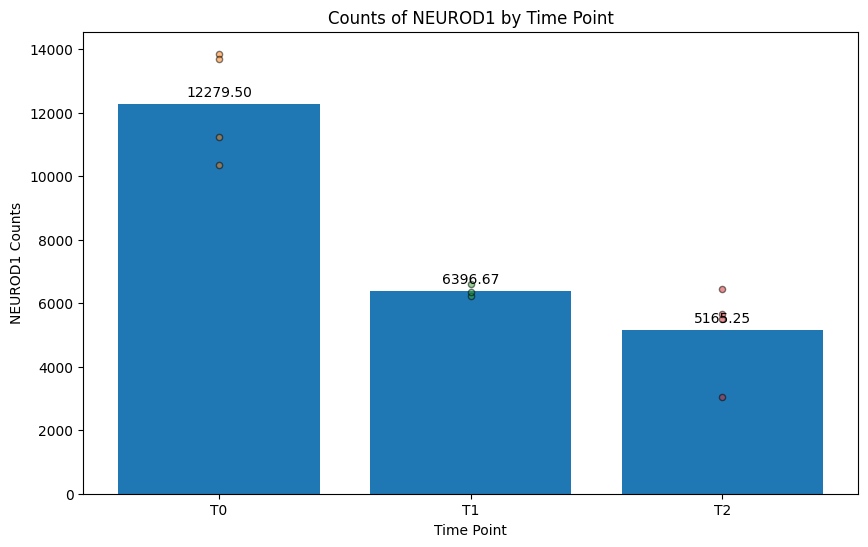

NKX6-1


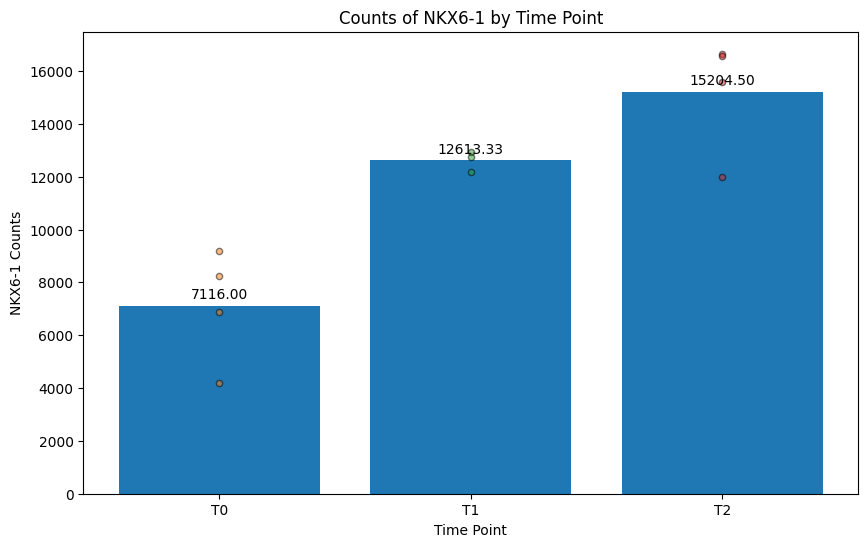

MAFA


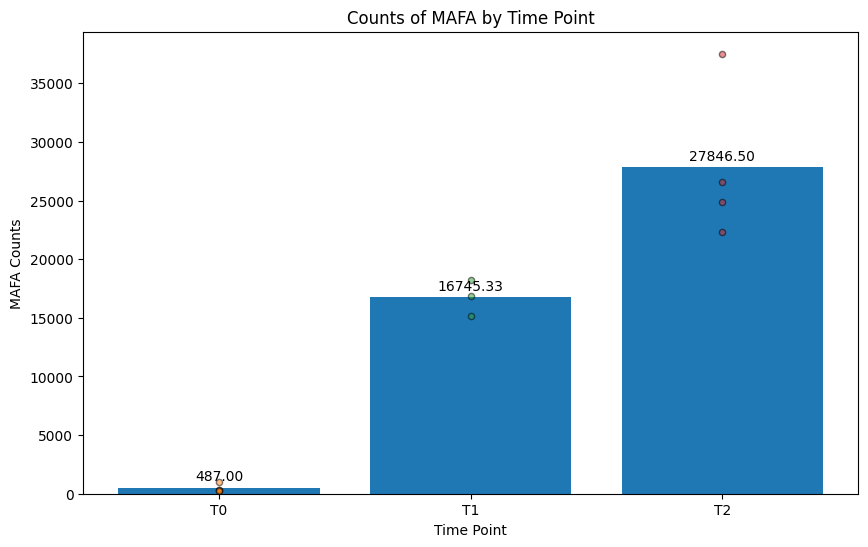

PDX1


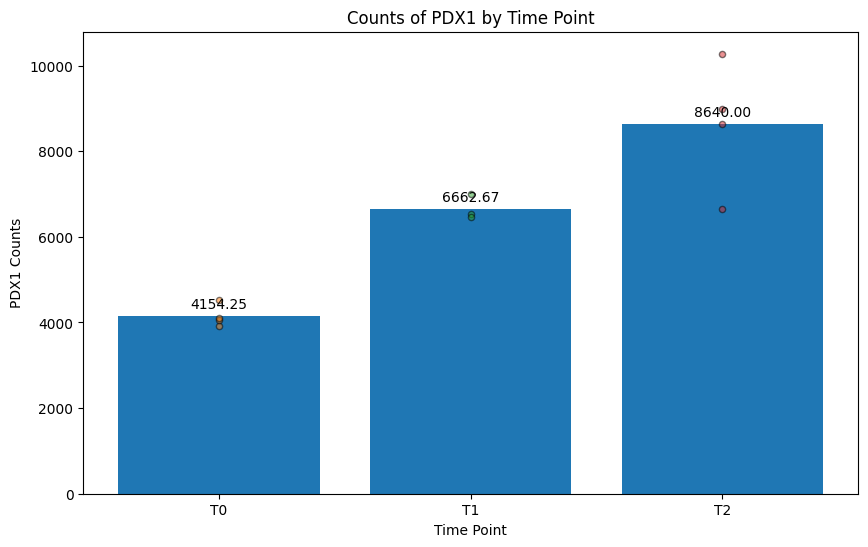

NR3C1


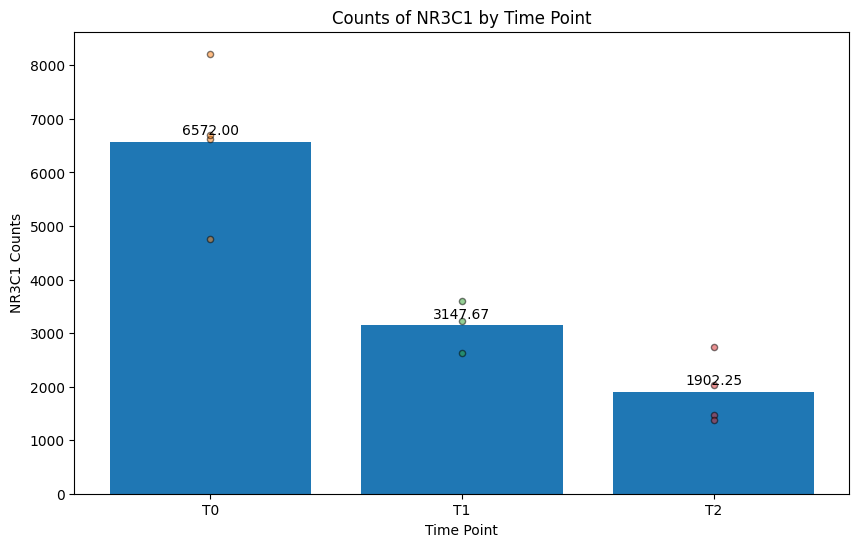

STAT3


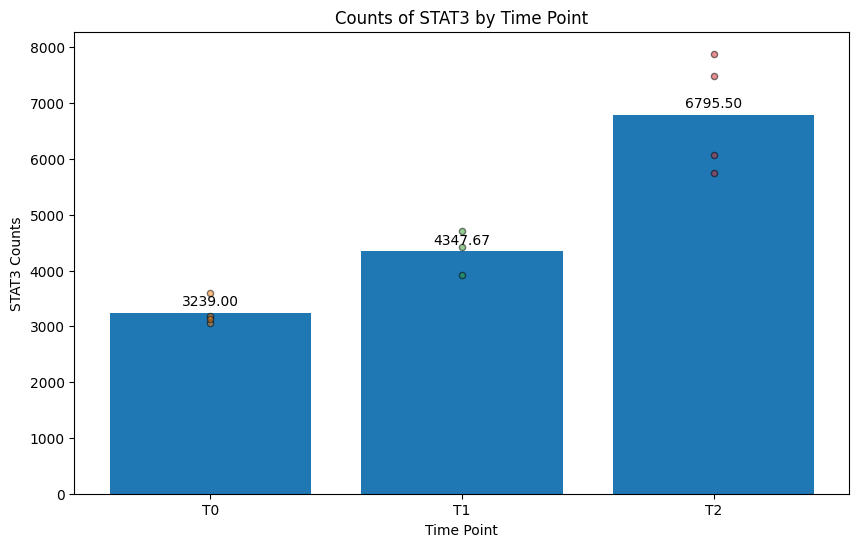

GLIS3


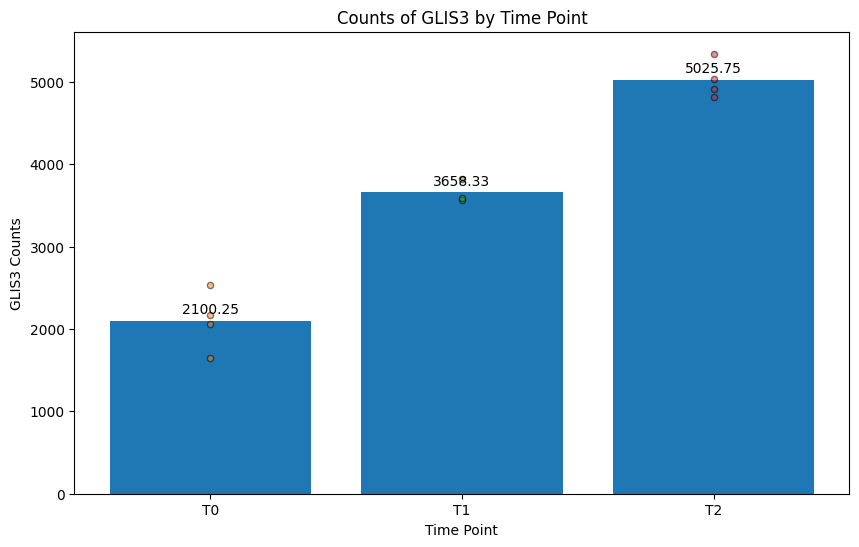

ASCL2


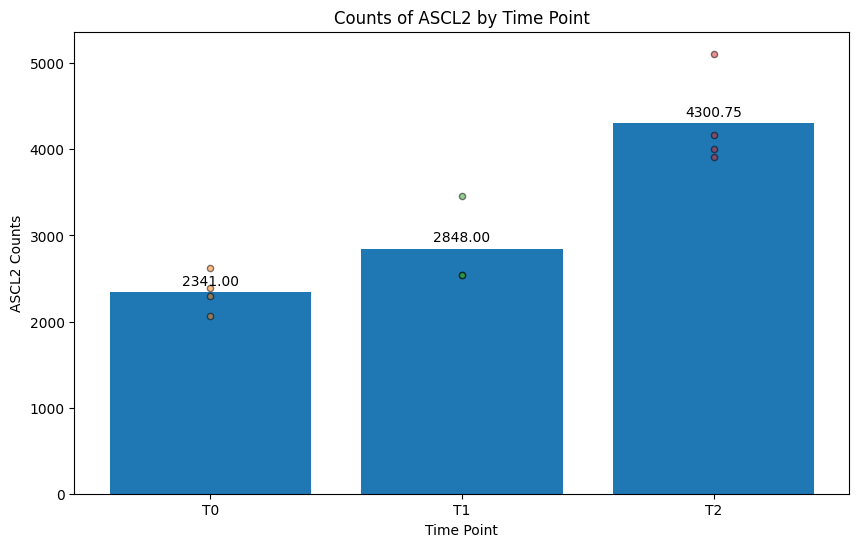

MLXIP


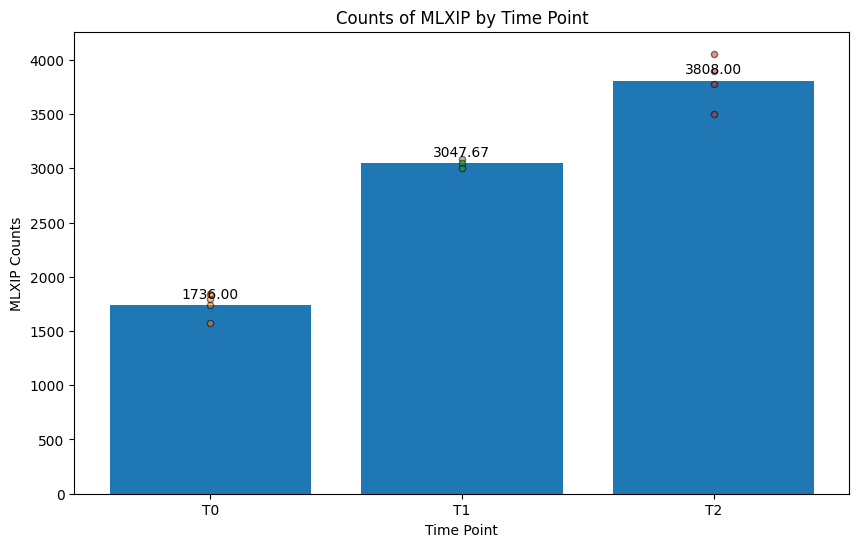

AHR


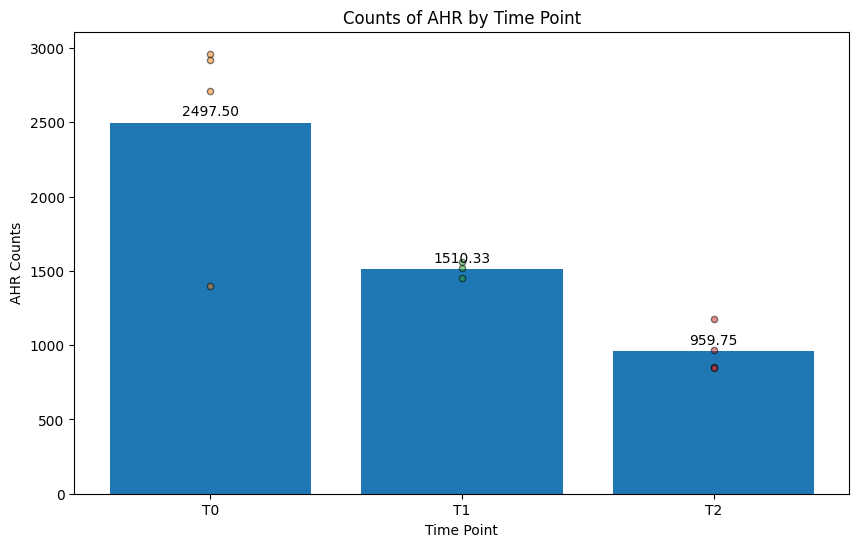

ZBTB17


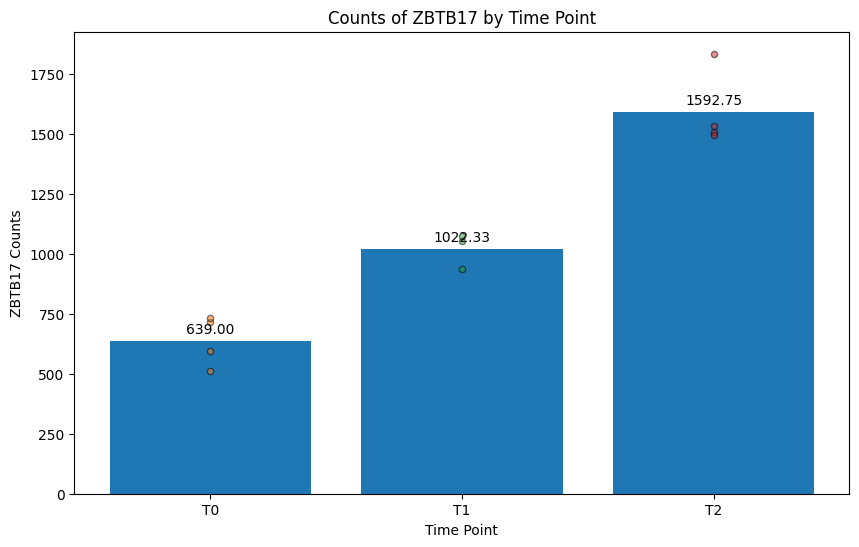

PGR


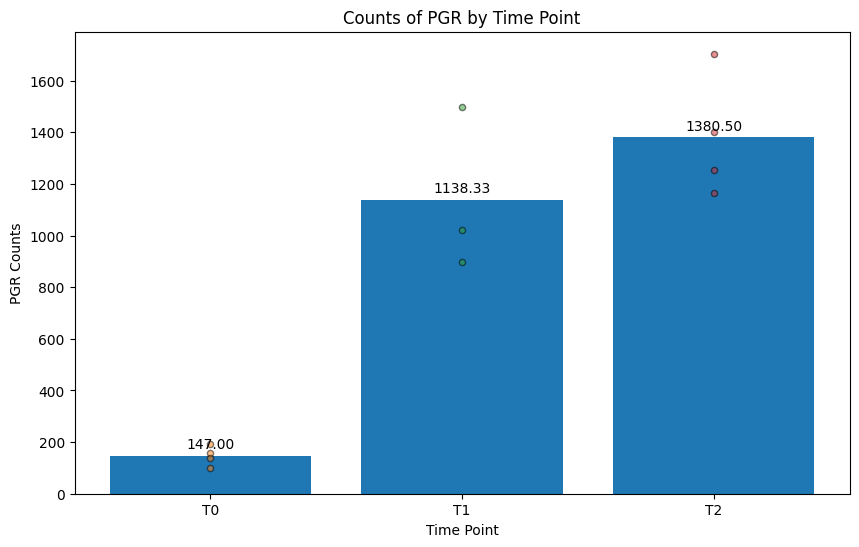

ASCL1


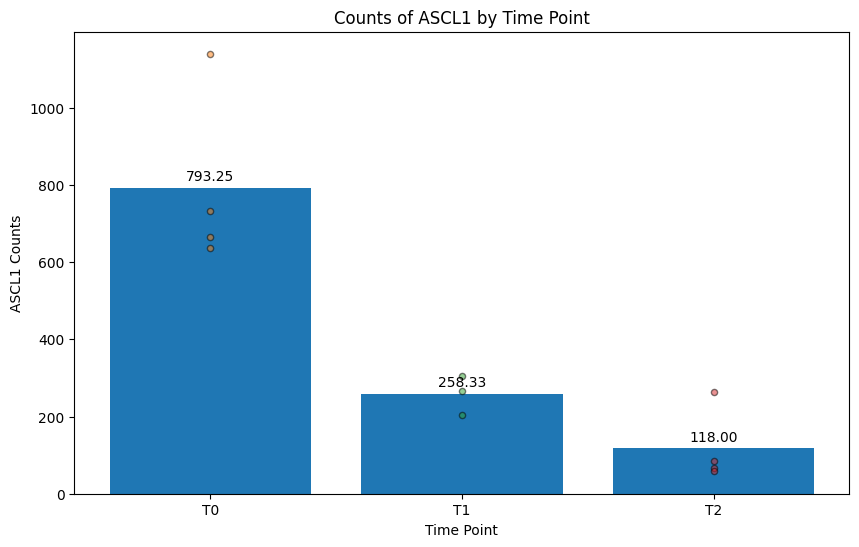

HNF1B


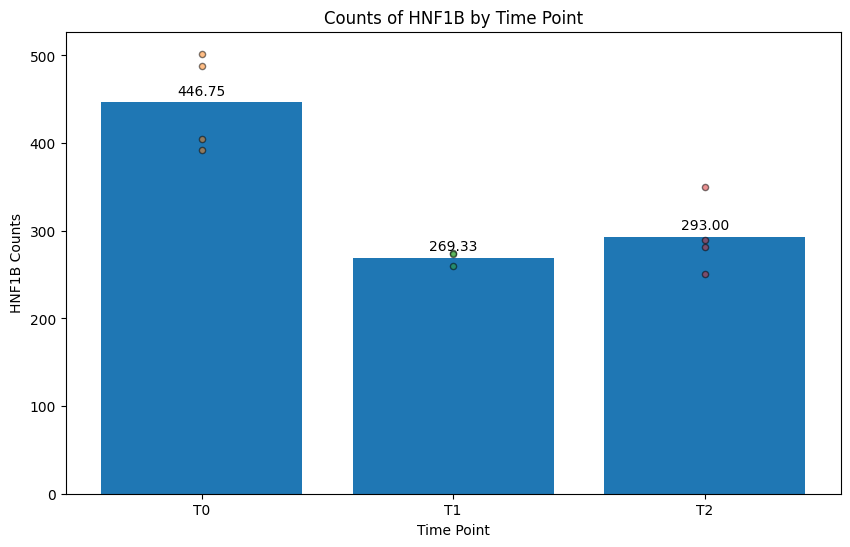

YBX3


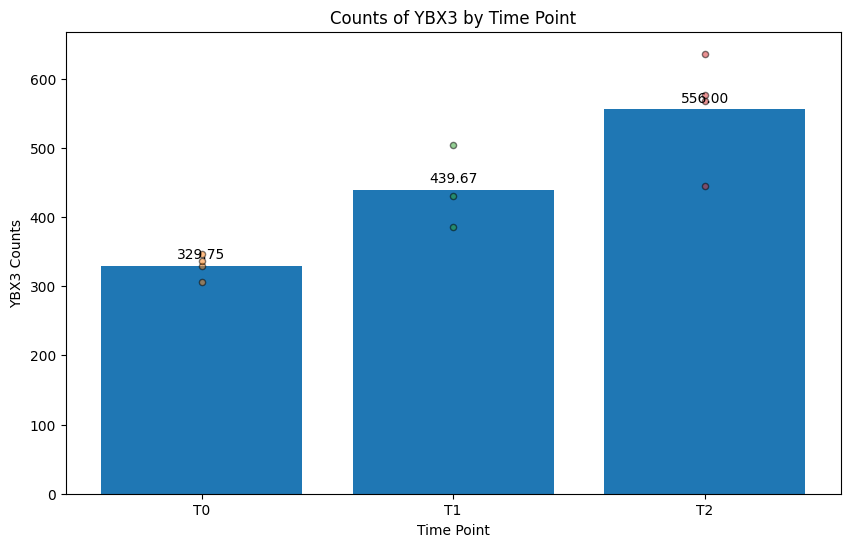

ARID5B


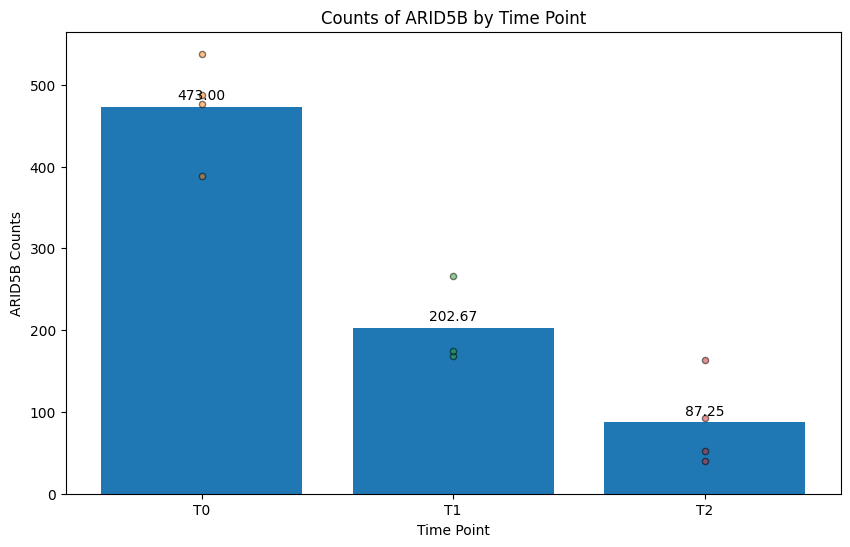

E2F3


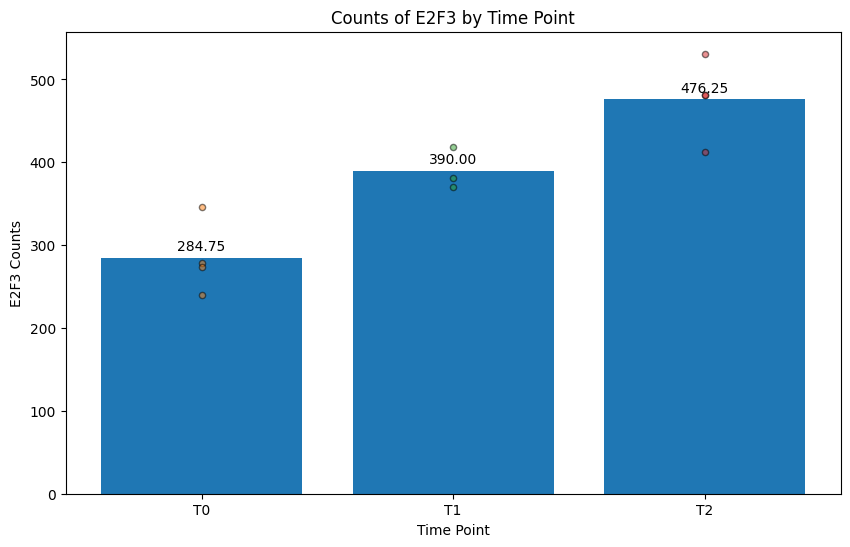

E2F1


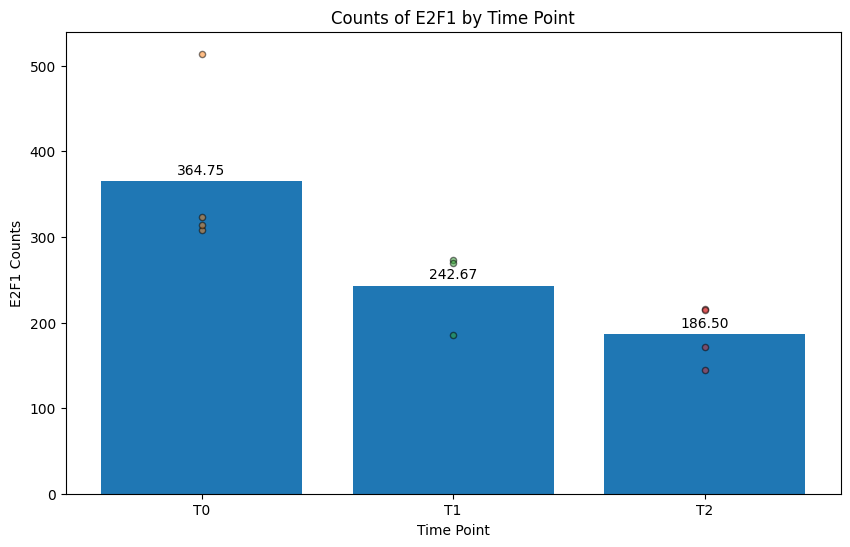

IRX1


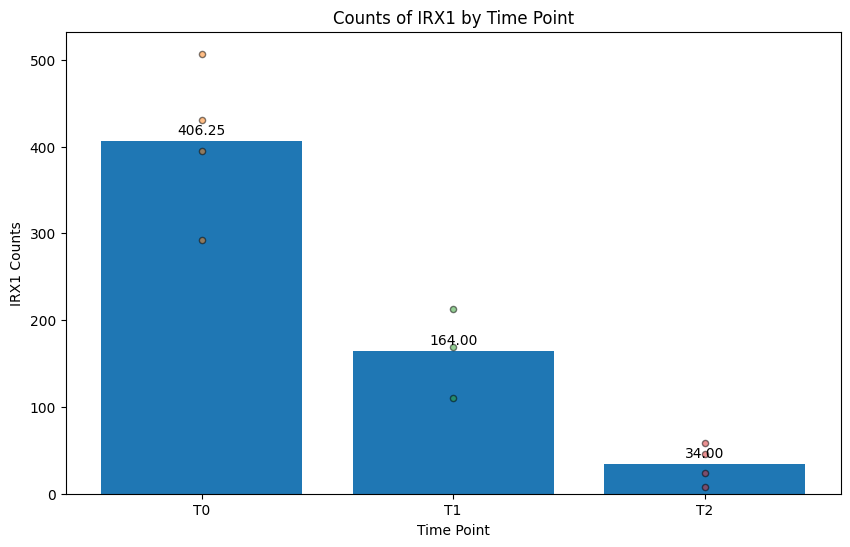

IRF2


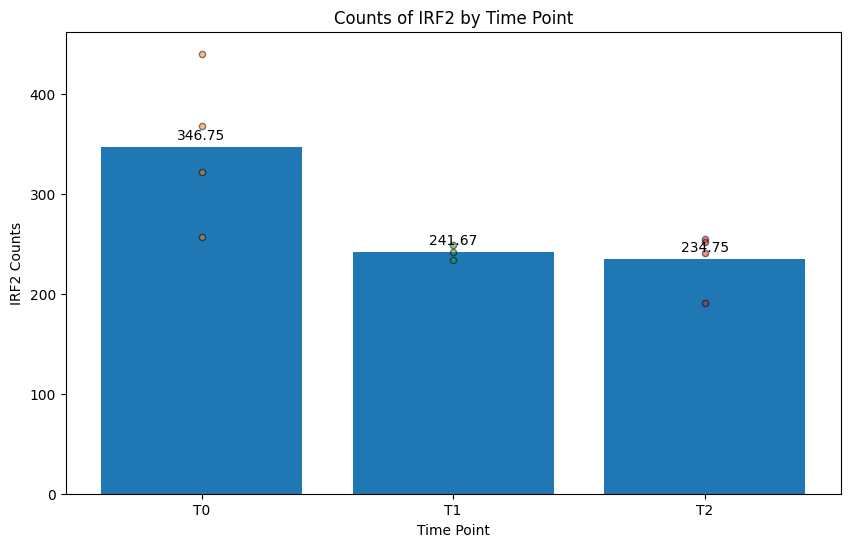

FOXM1


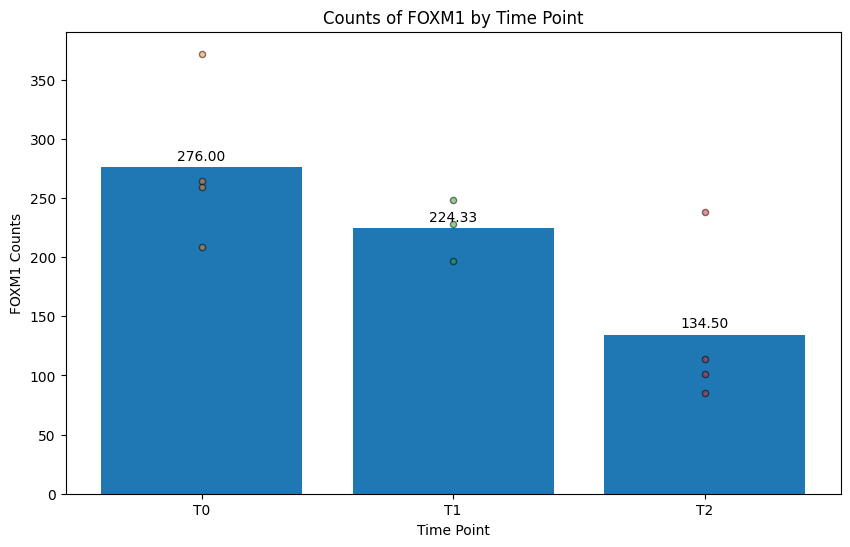

MXI1


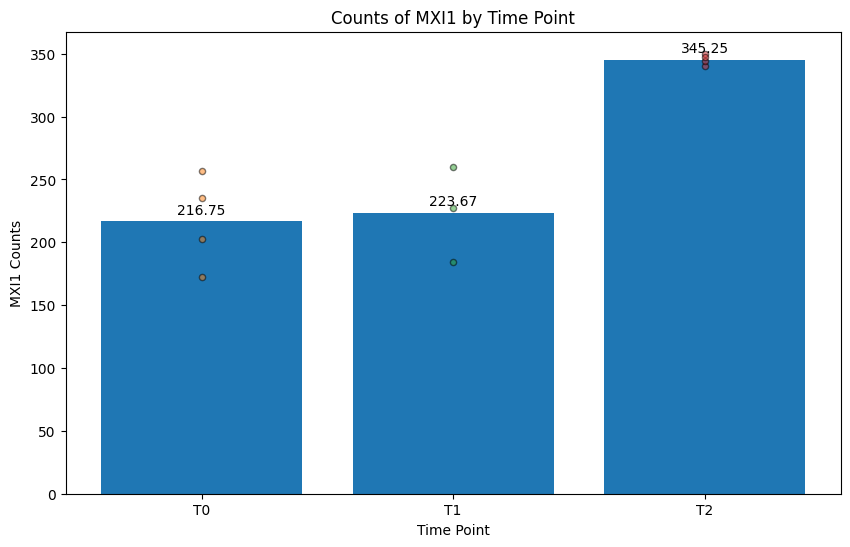

NR1D1


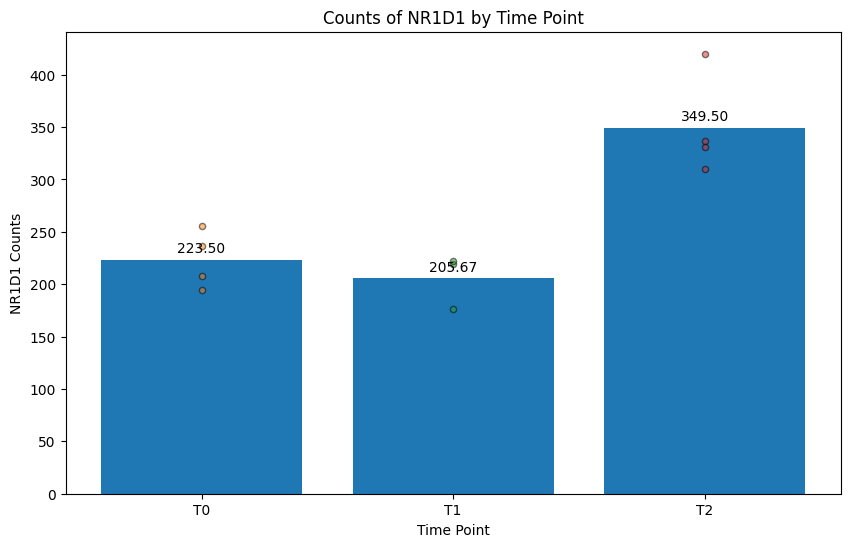

MITF


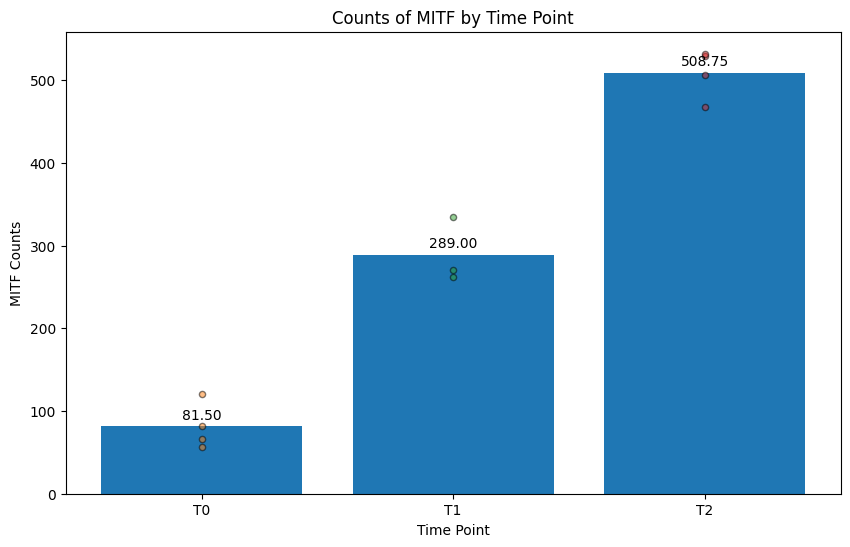

E2F2


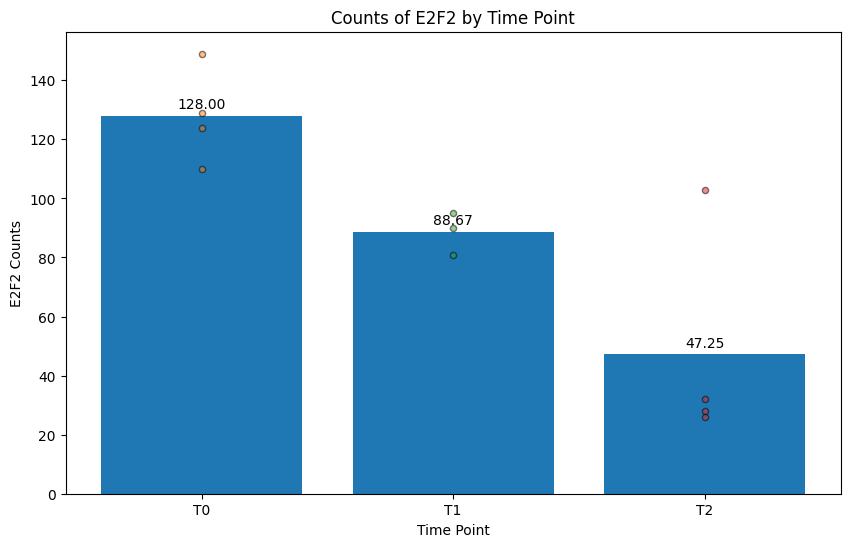

NR1H4


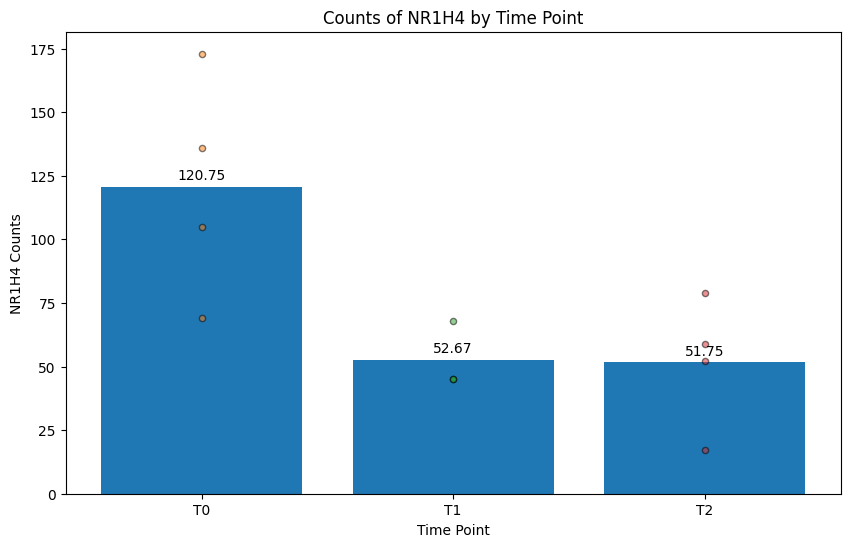

MEF2C


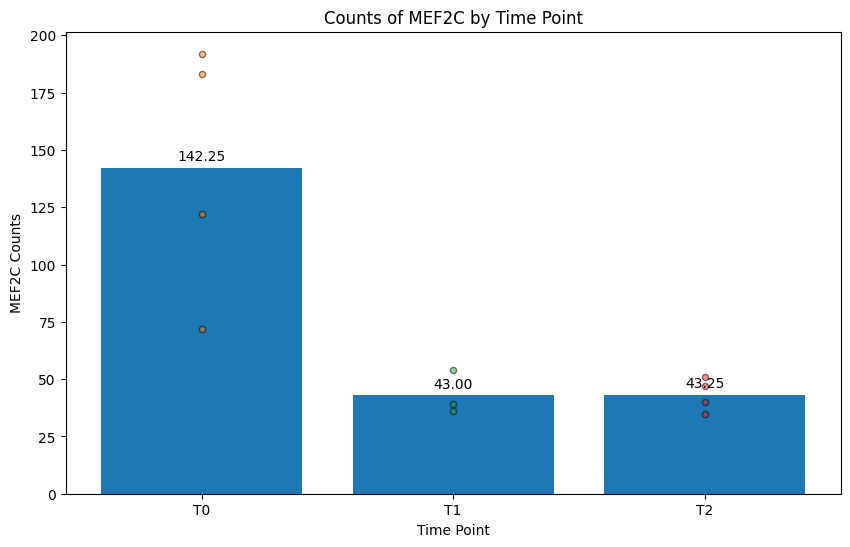

WWTR1


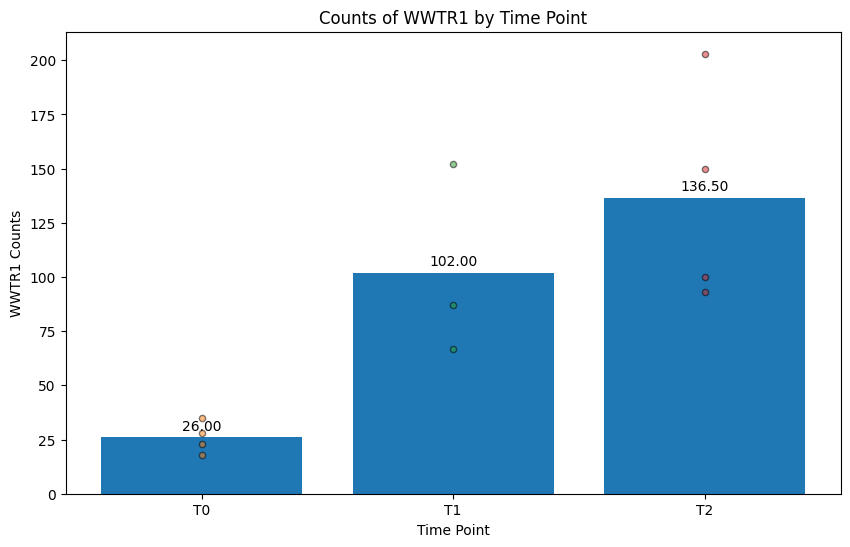

REST


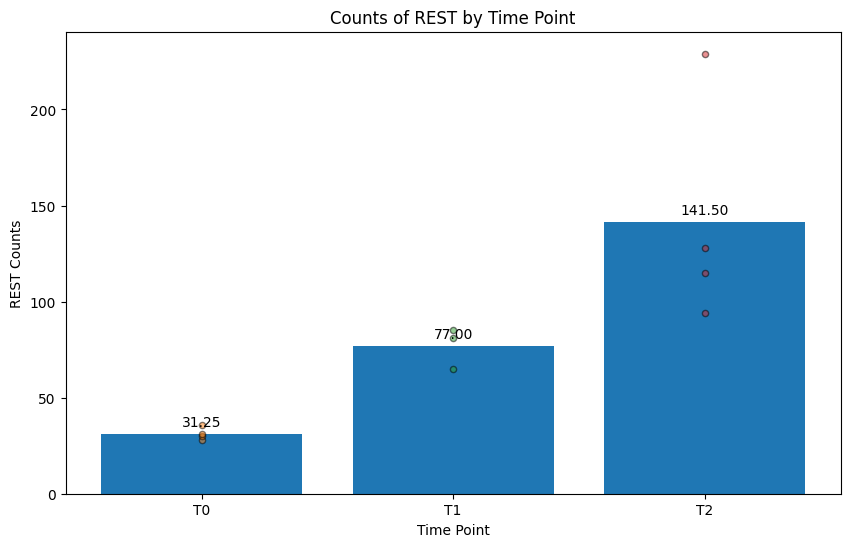

FHL2


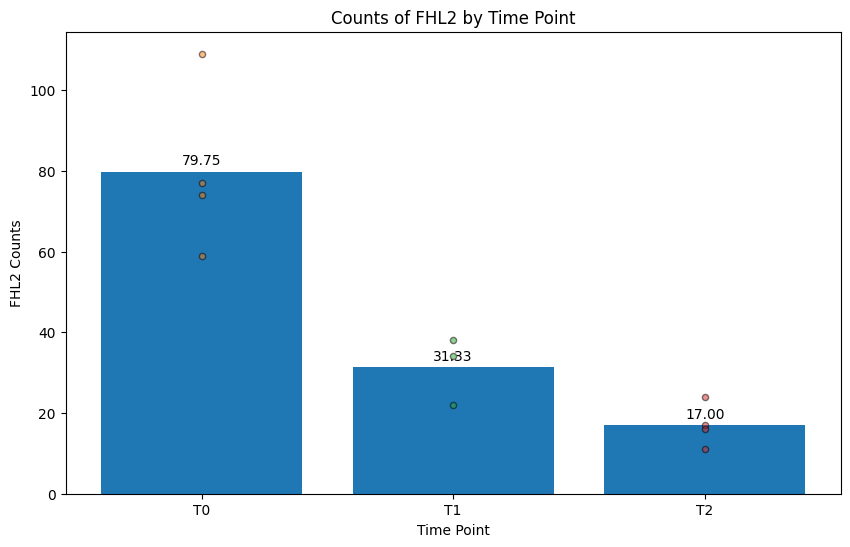

HEYL


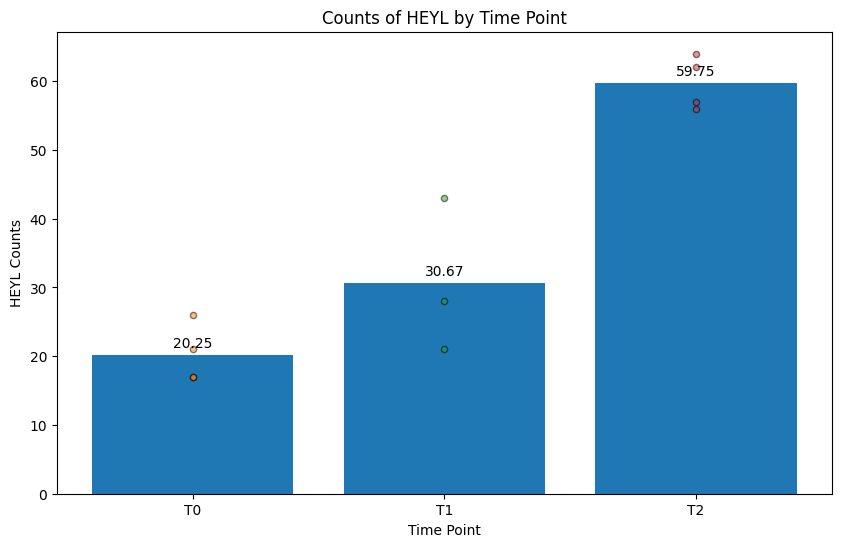

In [105]:
#plot for each gene
# X = T01, T02
# Y = (average LFC), avg basemean + jitter from baseMean from individual sample values?
subset_GOI[['MAFA', 'TimePoint']]

for gene in subset_GOI.columns[:-1]:
    print(gene)
    plt.figure(figsize=(10, 6))
    grouped = subset_GOI.groupby('TimePoint')[gene].mean().reset_index()
    bars = plt.bar(grouped['TimePoint'], grouped[gene])

    # Add individual points
    for time_point, group in subset_GOI.groupby('TimePoint'):
        x_values = [time_point] * len(group)
        plt.scatter(x_values, group[gene], alpha=0.5, s=20, edgecolors='k')

    # Add labels and title
    plt.xlabel('Time Point')
    plt.ylabel(f'{gene} Counts')
    plt.title(f'Counts of {gene} by Time Point')

    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    plt.show()
    plt.savefig(f'../figures/interesting_tfs/timepoint_WT/{gene}_counts.png')